# Clean and display the three datasets (EHR, GDP, Income)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns


# load GDP dataset
df_GDP = pd.read_csv('GDP_CA_2001_2020.csv')
df_GDP.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""06000""",California,8.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,1.692324e+09,1.722522e+09,...,2.063828e+09,2.113096e+09,2.179229e+09,2.256055e+09,2.357453e+09,2.427895e+09,2.541769e+09,2.643576e+09,2.739343e+09,2.663666e+09
1,"""06000""",California,8.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,8.008700e+01,8.151700e+01,...,9.766800e+01,1.000000e+02,1.031300e+02,1.067650e+02,1.115640e+02,1.148970e+02,1.202860e+02,1.251040e+02,1.296360e+02,1.260550e+02
2,"""06000""",California,8.0,CAGDP1,3.0,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1.375761e+09,1.418430e+09,...,2.023500e+09,2.113096e+09,2.220390e+09,2.335286e+09,2.473556e+09,2.569634e+09,2.730974e+09,2.895101e+09,3.052645e+09,3.007188e+09
3,"""06001""","Alameda, CA",8.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,8.179943e+07,8.258638e+07,...,9.320961e+07,9.574948e+07,9.866994e+07,1.023338e+08,1.094216e+08,1.129437e+08,1.191171e+08,1.237183e+08,1.261836e+08,1.217090e+08
4,"""06001""","Alameda, CA",8.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,8.543100e+01,8.625300e+01,...,9.734700e+01,1.000000e+02,1.030500e+02,1.068770e+02,1.142790e+02,1.179580e+02,1.244050e+02,1.292100e+02,1.317850e+02,1.271120e+02


In [43]:
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GeoFIPS                 181 non-null    object 
 1   GeoName                 177 non-null    object 
 2   Region                  177 non-null    float64
 3   TableName               177 non-null    object 
 4   LineCode                177 non-null    float64
 5   IndustryClassification  177 non-null    object 
 6   Description             177 non-null    object 
 7   Unit                    177 non-null    object 
 8   2001                    177 non-null    float64
 9   2002                    177 non-null    float64
 10  2003                    177 non-null    float64
 11  2004                    177 non-null    float64
 12  2005                    177 non-null    float64
 13  2006                    177 non-null    float64
 14  2007                    177 non-null    fl

In [44]:
df_GDP.describe()

,Region,LineCode,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,177.0,177.000000,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,...,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,8.0,2.000000,3.468765e+07,3.552719e+07,3.718282e+07,3.889249e+07,4.099984e+07,4.313326e+07,4.454368e+07,4.529435e+07,...,4.618526e+07,4.775363e+07,4.971368e+07,5.188148e+07,5.458981e+07,5.647088e+07,5.958153e+07,6.259023e+07,6.545566e+07,6.409773e+07
std,0.0,0.818813,1.699176e+08,1.738176e+08,1.817864e+08,1.899086e+08,1.998052e+08,2.100903e+08,2.167973e+08,2.205643e+08,...,2.250071e+08,2.324972e+08,2.419280e+08,2.524382e+08,2.657108e+08,2.748022e+08,2.898891e+08,3.045556e+08,3.186079e+08,3.116377e+08
min,8.0,1.000000,5.938200e+01,5.681400e+01,6.015900e+01,6.253500e+01,6.649600e+01,7.155500e+01,7.583900e+01,7.607400e+01,...,8.207300e+01,1.000000e+02,9.313200e+01,8.916500e+01,9.017200e+01,9.650500e+01,9.103100e+01,9.154400e+01,9.107600e+01,9.207800e+01
25%,8.0,1.000000,9.166500e+01,9.896600e+01,9.948900e+01,1.011600e+02,1.033000e+02,1.061110e+02,1.058010e+02,1.039260e+02,...,1.046980e+02,1.000000e+02,1.037400e+02,1.068900e+02,1.114700e+02,1.158850e+02,1.202860e+02,1.222820e+02,1.275750e+02,1.248210e+02
50%,8.0,2.000000,1.118369e+06,1.229494e+06,1.254471e+06,1.354372e+06,1.419893e+06,1.481254e+06,1.486497e+06,1.452987e+06,...,1.441492e+06,1.382695e+06,1.440258e+06,1.488434e+06,1.576129e+06,1.624237e+06,1.732487e+06,1.786296e+06,1.870309e+06,1.848108e+06
75%,8.0,3.000000,1.140431e+07,1.216344e+07,1.241956e+07,1.306165e+07,1.419982e+07,1.488086e+07,1.539080e+07,1.555348e+07,...,1.602862e+07,1.671216e+07,1.760231e+07,1.836294e+07,1.923534e+07,1.962348e+07,2.063280e+07,2.123421e+07,2.165822e+07,2.143904e+07
max,8.0,3.000000,1.692324e+09,1.722522e+09,1.789999e+09,1.850904e+09,1.926842e+09,2.002437e+09,2.041192e+09,2.061639e+09,...,2.063828e+09,2.113096e+09,2.220390e+09,2.335286e+09,2.473556e+09,2.569634e+09,2.730974e+09,2.895101e+09,3.052645e+09,3.007188e+09


In [45]:
# clean the noisy data
df_GDP['GeoName'] = df_GDP['GeoName'].str.rstrip(', CA')
df_GDP.drop(df_GDP.tail(4).index,inplace=True) # drop last n rows
df_GDP = df_GDP.drop(['GeoFIPS','Region','TableName','LineCode','IndustryClassification'],axis=1)
df_GDP = df_GDP[df_GDP.Description == 'Current-dollar GDP (thousands of current dollars)']
df_GDP = df_GDP.drop(df_GDP.columns[3:14],axis=1)
df_GDP = df_GDP.dropna()
df_GDP = df_GDP.drop(df_GDP.columns[-1:],axis=1)
df_GDP = df_GDP.drop(df_GDP.columns[1:2],axis=1)

In [46]:
df_GDP.head()

,GeoName,Unit,2012,2013,2014,2015,2016,2017,2018,2019
2,California,Thousands of dollars,2.113096e+09,2.220390e+09,2.335286e+09,2.473556e+09,2.569634e+09,2.730974e+09,2.895101e+09,3.052645e+09
5,Alameda,Thousands of dollars,9.574948e+07,1.005214e+08,1.059368e+08,1.157918e+08,1.210535e+08,1.290289e+08,1.361689e+08,1.418886e+08
8,Alpine,Thousands of dollars,9.529400e+04,9.392700e+04,1.027050e+05,1.085030e+05,1.092630e+05,1.108430e+05,1.140550e+05,1.219480e+05
11,Amador,Thousands of dollars,1.365613e+06,1.440258e+06,1.488434e+06,1.551133e+06,1.617941e+06,1.732487e+06,1.786296e+06,1.870309e+06
14,Butte,Thousands of dollars,7.363012e+06,7.602095e+06,7.634930e+06,8.041364e+06,8.649007e+06,9.189787e+06,9.500527e+06,9.893227e+06


In [47]:
# load EHR dataset
df_EHR = pd.read_csv('EHR_Incentive_Program_Payments_Hospitals.csv')
df_EHR.head()

,X,Y,OBJECTID,Provider_Name,NPI,CCN,Business_Street_Address,Business_City,Business_County,Business_ZIP_Code,...,Payment_Year_Number,Program_Type,Medicaid_EP_Hospital_Type,total_payments,Last_Payment_Criteria,Recent_Disbursement_Amount,Latitude,Longitude,Last_Program_Year,Last_Payment_Year
0,-124.142009,40.783559,1,ST JOSEPH HEALTH NORTHERN CALIFORNIA LLC,1609858950,50006,2700 Dolbeer St,Eureka,Humboldt,95501,...,4,Medicare/Medicaid,Acute Care Hospitals,1530950.70,MU,153095.07,40.783559,-124.142009,2015,2016
1,-122.086674,37.632915,2,HAYWARD SISTERS HOSPITAL,1942298153,50002,27200 Calaroga Ave,Hayward,Alameda,94545,...,4,Medicare/Medicaid,Acute Care Hospitals,3245920.28,MU,324592.03,37.632915,-122.086674,2015,2016
2,-122.295861,38.325402,3,ST JOSEPH HEALTH NORTHERN CALIFORNIA LLC,1235218785,50009,1000 Trancas St,Napa,Napa,94558,...,4,Medicare/Medicaid,Acute Care Hospitals,1262015.89,MU,126201.59,38.325402,-122.295861,2015,2016
3,-120.766467,38.350920,4,SUTTER VALLEY HOSPITALS,1447494323,50014,200 Mission Blvd,Jackson,Amador,95642,...,4,Medicare/Medicaid,Acute Care Hospitals,865130.13,MU,86513.01,38.350920,-120.766467,2017,2019
4,-122.435820,37.769049,5,Sutter Bay Hospitals,1659439834,50008,CASTRO AND DUBOCE,San Francisco,San Francisco,94114,...,4,Medicare/Medicaid,Acute Care Hospitals,984465.12,MU,98446.51,37.769049,-122.435820,2016,2019


In [48]:
df_EHR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   X                           323 non-null    float64
 1   Y                           323 non-null    float64
 2   OBJECTID                    323 non-null    int64  
 3   Provider_Name               323 non-null    object 
 4   NPI                         323 non-null    int64  
 5   CCN                         323 non-null    int64  
 6   Business_Street_Address     323 non-null    object 
 7   Business_City               323 non-null    object 
 8   Business_County             323 non-null    object 
 9   Business_ZIP_Code           323 non-null    int64  
 10  Business_State_Territory    323 non-null    object 
 11  Payment_Year_Number         323 non-null    int64  
 12  Program_Type                323 non-null    object 
 13  Medicaid_EP_Hospital_Type   323 non

In [49]:
df_EHR.describe()

,X,Y,OBJECTID,NPI,CCN,Business_ZIP_Code,Payment_Year_Number,total_payments,Recent_Disbursement_Amount,Latitude,Longitude,Last_Program_Year,Last_Payment_Year
count,323.000000,323.000000,323.000000,3.230000e+02,323.000000,323.000000,323.000000,3.230000e+02,3.230000e+02,323.000000,323.000000,323.000000,323.000000
mean,-119.691346,35.925302,162.000000,1.485262e+09,50544.764706,93182.696594,3.647059,2.454706e+06,3.283814e+05,35.925302,-119.691346,2015.411765,2017.306502
std,2.138093,2.258944,93.386294,2.836453e+08,630.602606,1807.988158,0.791580,2.315617e+06,6.346466e+05,2.258944,2.138093,1.662740,2.239299
min,-124.193188,32.618573,1.000000,1.003819e+09,50002.000000,90004.000000,1.000000,7.565500e+03,7.565500e+02,32.618573,-124.193188,2011.000000,2012.000000
25%,-121.942473,33.982795,81.500000,1.235142e+09,50151.000000,91793.500000,4.000000,8.510842e+05,1.001754e+05,33.982795,-121.942473,2014.000000,2015.000000
50%,-118.882161,35.130053,162.000000,1.467539e+09,50380.000000,93230.000000,4.000000,1.573884e+06,2.156268e+05,35.130053,-118.882161,2015.000000,2018.000000
75%,-117.986769,37.776715,242.500000,1.740314e+09,50687.000000,94593.500000,4.000000,3.311855e+06,3.854408e+05,37.776715,-117.986769,2016.000000,2019.000000
max,-114.595504,41.772717,323.000000,1.992899e+09,53311.000000,96161.000000,4.000000,1.252723e+07,1.032557e+07,41.772717,-114.595504,2019.000000,2020.000000


In [50]:
# clean the noisy data
df_EHR = df_EHR.drop(df_EHR.columns[0:7], axis=1)
df_EHR = df_EHR.drop(df_EHR.columns[[0,2,3,4,5,6,8,9,10,11,12]], axis=1)
#df_EHR = df_EHR.drop(['Payment__1','Payment_Cr','Payee_Name','Payee_NPI','total_rece','Latitude','Longitude','Program_Ye'],axis=1)
df_EHR = df_EHR.dropna()
df_EHR.head()

,Business_County,total_payments,Last_Payment_Year
0,Humboldt,1530950.70,2016
1,Alameda,3245920.28,2016
2,Napa,1262015.89,2016
3,Amador,865130.13,2019
4,San Francisco,984465.12,2019


In [51]:
df_EHR = df_EHR.rename({'Business_County':'County','Last_Payment_Year': 'Payment_Ye', 'total_payments': 'EHR Total Payment'}, axis=1) 
df_EHR.head()

,County,EHR Total Payment,Payment_Ye
0,Humboldt,1530950.70,2016
1,Alameda,3245920.28,2016
2,Napa,1262015.89,2016
3,Amador,865130.13,2019
4,San Francisco,984465.12,2019


In [52]:
df_EHR['Payment_Ye'] = df_EHR['Payment_Ye'].apply(lambda x: str(x))

In [53]:
# load median income dataset
df_income = pd.read_excel('B-6__Comparison_By_County.xlsx')
df_income.head()

,Taxable Year,County,Population,All Returns,AGI,Median Income,Median Rank,Joint Returns,Joint Returns Median Income,Joint Returns Median Rank,Tax Assessed,Latitude,Longitude,New Georeferenced Column
0,2017,Nonresident,NaN,756843,32798066000,14600,NaN,371420,20592,NaN,3713047000,0.000000,0.00000,POINT (0 0)
1,2012,Unallocated,0.0,2885,580682000,51249,0.0,1194,127511,0.0,19336000,0.000000,0.00000,POINT (0 0)
2,2010,Unallocated,0.0,2880,287037000,36227,0.0,1041,86697,0.0,12616000,0.000000,0.00000,POINT (0 0)
3,2006,Unallocated,0.0,3710,392781000,31384,0.0,1260,70468,0.0,14728000,0.000000,0.00000,POINT (0 0)
4,1995,Ventura,712700.0,281369,11450530000,26210,10.0,133610,47458,9.0,414669000,34.277091,-119.21785,POINT (-119.2178496 34.27709072)


In [54]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Taxable Year                 1525 non-null   int64  
 1   County                       1525 non-null   object 
 2   Population                   1516 non-null   float64
 3   All Returns                  1525 non-null   int64  
 4   AGI                          1525 non-null   int64  
 5   Median Income                1525 non-null   int64  
 6   Median Rank                  1516 non-null   float64
 7   Joint Returns                1525 non-null   int64  
 8   Joint Returns Median Income  1525 non-null   int64  
 9   Joint Returns Median Rank    1516 non-null   float64
 10  Tax Assessed                 1525 non-null   int64  
 11  Latitude                     1525 non-null   float64
 12  Longitude                    1525 non-null   float64
 13  New Georeferenced 

In [55]:
df_income.describe()

,Taxable Year,Population,All Returns,AGI,Median Income,Median Rank,Joint Returns,Joint Returns Median Income,Joint Returns Median Rank,Tax Assessed,Latitude,Longitude
count,1525.000000,1.516000e+03,1.525000e+03,1.525000e+03,1525.000000,1516.000000,1.525000e+03,1525.00000,1516.000000,1.525000e+03,1525.000000,1525.000000
mean,2007.000000,6.054195e+05,2.518661e+05,1.854484e+10,33192.744262,28.215699,9.804150e+04,60750.32918,28.215699,8.113302e+08,35.958091,-114.839606
std,7.213468,1.394779e+06,5.528343e+05,4.269146e+10,9011.930707,17.449568,1.930520e+05,21335.52830,17.449568,1.989108e+09,8.447037,26.197287
min,1995.000000,0.000000e+00,2.770000e+02,9.078000e+06,14567.000000,0.000000,1.050000e+02,19743.00000,0.000000,2.500000e+05,0.000000,-123.892004
25%,2001.000000,3.713200e+04,1.736300e+04,7.245640e+08,27317.000000,13.000000,8.477000e+03,46568.00000,13.000000,2.136200e+07,36.324707,-122.078097
50%,2007.000000,1.584055e+05,6.792300e+04,3.340652e+09,31725.000000,28.000000,3.164000e+04,56254.00000,28.000000,1.127690e+08,37.988180,-120.943072
75%,2013.000000,5.321470e+05,2.348310e+05,1.480678e+10,37345.000000,43.000000,1.002580e+05,69374.00000,43.000000,6.101010e+08,39.167981,-119.698820
max,2019.000000,1.039941e+07,4.653590e+06,3.996088e+11,74077.000000,58.000000,1.370633e+06,178755.00000,58.000000,2.114381e+10,41.713682,0.000000


In [56]:
# clean the noisy data
df_income = df_income[(df_income["Taxable Year"]>=2012) & (df_income["Taxable Year"]<=2019)]
df_income["Taxable Year"].unique()

array([2017, 2012, 2019, 2015, 2013, 2016, 2018, 2014])

In [57]:
df_income['Taxable Year'] = df_income['Taxable Year'].apply(lambda x: str(x))
df_income = df_income.drop(df_income.columns[[3,4,6,7,8,9,10,11,12,13]], axis=1)
df_income.head()

,Taxable Year,County,Population,Median Income
0,2017,Nonresident,NaN,14600
1,2012,Unallocated,0.0,51249
8,2019,San Benito,62789.0,47341
12,2017,Shasta,178240.0,35365
14,2015,Los Angeles,10185487.0,33369


# Aggregate the datasets

In [58]:
df_GDP = df_GDP.groupby(['GeoName','Unit']).sum().reset_index()
df_GDP.head(5)

,GeoName,Unit,2012,2013,2014,2015,2016,2017,2018,2019
0,Alameda,Thousands of dollars,95749481.0,100521444.0,105936777.0,115791781.0,121053460.0,129028899.0,136168877.0,141888634.0
1,Alpine,Thousands of dollars,95294.0,93927.0,102705.0,108503.0,109263.0,110843.0,114055.0,121948.0
2,Amador,Thousands of dollars,1365613.0,1440258.0,1488434.0,1551133.0,1617941.0,1732487.0,1786296.0,1870309.0
3,Butte,Thousands of dollars,7363012.0,7602095.0,7634930.0,8041364.0,8649007.0,9189787.0,9500527.0,9893227.0
4,Calaveras,Thousands of dollars,1050964.0,1044218.0,1172626.0,1246769.0,1362303.0,1442782.0,1415632.0,1661687.0


In [61]:
df_EHR = df_EHR.groupby(['County','Payment_Ye']).sum().reset_index()
df_EHR.head()

,County,Payment_Ye,EHR Total Payment
0,Alameda,2013,757172.90
1,Alameda,2016,18890201.49
2,Alameda,2019,6760775.32
3,Alameda,2020,5593440.78
4,Amador,2019,865130.13


# Reshape the dataset (GDP) from wide format to long format

In [62]:
year_list = df_GDP.columns[3:]
df_GDP = pd.melt(df_GDP, id_vars=['GeoName','Unit'], value_vars=year_list) #Pandas.melt() unpivots a DataFrame from wide format to long format
df_GDP.head()

,GeoName,Unit,variable,value
0,Alameda,Thousands of dollars,2013,100521444.0
1,Alpine,Thousands of dollars,2013,93927.0
2,Amador,Thousands of dollars,2013,1440258.0
3,Butte,Thousands of dollars,2013,7602095.0
4,Calaveras,Thousands of dollars,2013,1044218.0


# Change the column names

In [63]:
df_GDP = df_GDP.rename({'GeoName':'County','Unit': 'Unit of GDP', 'variable': 'Year', 'value':'GDP'}, axis=1) 
df_GDP.head()

,County,Unit of GDP,Year,GDP
0,Alameda,Thousands of dollars,2013,100521444.0
1,Alpine,Thousands of dollars,2013,93927.0
2,Amador,Thousands of dollars,2013,1440258.0
3,Butte,Thousands of dollars,2013,7602095.0
4,Calaveras,Thousands of dollars,2013,1044218.0


# Combine the datasets

In [64]:
df = df_GDP.merge(df_EHR, how='inner', left_on=['County', 'Year'], right_on=['County', 'Payment_Ye'])
df.head()

,County,Unit of GDP,Year,GDP,Payment_Ye,EHR Total Payment
0,Alameda,Thousands of dollars,2013,100521444.0,2013,757172.90
1,Kern,Thousands of dollars,2013,47122155.0,2013,6983457.41
2,Kings,Thousands of dollars,2013,5227087.0,2013,631722.26
3,Los Angeles,Thousands of dollars,2013,597849809.0,2013,2519349.54
4,Mono,Thousands of dollars,2013,917912.0,2013,345199.57


In [65]:
df = df.merge(df_income, how='inner', left_on=['County', 'Year'], right_on=['County', 'Taxable Year'])
df.head()

,County,Unit of GDP,Year,GDP,Payment_Ye,EHR Total Payment,Taxable Year,Population,Median Income
0,Alameda,Thousands of dollars,2013,100521444.0,2013,757172.90,2013,1563495.0,46217
1,Kern,Thousands of dollars,2013,47122155.0,2013,6983457.41,2013,865511.0,30938
2,Kings,Thousands of dollars,2013,5227087.0,2013,631722.26,2013,150507.0,29537
3,Los Angeles,Thousands of dollars,2013,597849809.0,2013,2519349.54,2013,10013265.0,31516
4,Mono,Thousands of dollars,2013,917912.0,2013,345199.57,2013,14477.0,31546


In [66]:
df = df.drop(df.columns[[4,6]],axis=1)

In [67]:
# swap the columns
cols = list(df.columns)
a, b = cols.index('Unit of GDP'), cols.index('Year')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]

In [68]:
df.head()

,County,Year,Unit of GDP,GDP,EHR Total Payment,Population,Median Income
0,Alameda,2013,Thousands of dollars,100521444.0,757172.90,1563495.0,46217
1,Kern,2013,Thousands of dollars,47122155.0,6983457.41,865511.0,30938
2,Kings,2013,Thousands of dollars,5227087.0,631722.26,150507.0,29537
3,Los Angeles,2013,Thousands of dollars,597849809.0,2519349.54,10013265.0,31516
4,Mono,2013,Thousands of dollars,917912.0,345199.57,14477.0,31546


# Year-by-year EHR spending correlation with GDP analysis

<AxesSubplot: xlabel='GDP', ylabel='EHR Total Payment'>

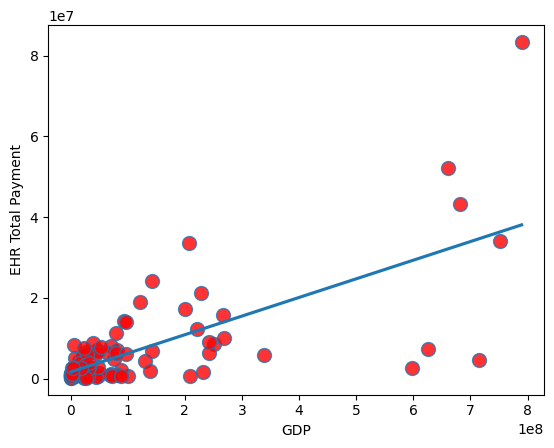

In [70]:
import seaborn as sns
sns.regplot(x='GDP', y='EHR Total Payment', data=df, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

## Outlier Treatment

Quantile-based Flooring and Capping
In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. The lines of code below print the 10th and 90th percentiles of the variable 'Income', respectively. These values will be used for quantile-based flooring and capping.

In [79]:
print(df['GDP'].quantile(0.10))
print(df['GDP'].quantile(0.90))

1343309.7000000002
245565614.79999998


In [80]:
print(df['GDP'].skew())

# remove the outlier
df["GDP"] = np.where(df["GDP"] <1343309.7, 1343309.7,df['GDP'])
df["GDP"] = np.where(df["GDP"] >245565614.8, 245565614.8,df['GDP'])

print(df['GDP'].skew())

2.6862359761345984
1.2108480507506736


The above output shows that the skewness value came down from 2.68 to 1.21, confirming that the distribution has been treated for extreme values.

## 1. Application of Linear Regression - EHR & GDP

Linear regression is suited for estimating continuous values

Linear regression model fit line: The plot shows us how well we are able to fit the relationship between the GDP value and the total payment of EHR.

In [81]:
# ================================================
# Build the model
# ================================================

# Training data
X = df.loc[:,["GDP"]]  # features matrix
y = df.loc[:,'EHR Total Payment']  # target (response) matix

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predicting test set result

In [82]:
y_pred = model.predict(X_test)

# Comparing the test values and the predicted values
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df.head()

,Actual,Predicted
25,12291359.98,1.752793e+07
51,975565.30,7.152059e+06
21,2743310.81,1.413307e+06
26,4754145.45,6.727177e+06
68,239747.26,1.097122e+06


### Checking the residuals 

In [83]:
residuals = y_test - y_pred
residuals.head()

25   -5.236572e+06
51   -6.176494e+06
21    1.330004e+06
26   -1.973032e+06
68   -8.573745e+05
Name: EHR Total Payment, dtype: float64

In [84]:
import hvplot.pandas
pd.DataFrame({'True Values(y test)': y_test, 'Predicted Values': y_pred}).hvplot.scatter(x='True Values(y test)', y='Predicted Values')

:Scatter   [True Values(y test)]   (Predicted Values)

The values seem to align linearly, which shows that the model is acceptable.

### Model Evaluation

Check the coefficients, P values, MAE, MSE, RMSE, R2 square

Coefficients: Quantify the strength of relationship with correaltion(R)

P value: The probability that randomly drawn points will result in the similarly strong relationship, so the smaller the p-value, the more confidence we have in the predictions we make with the line.

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [85]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [86]:
# coefficient
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
GDP,0.074808


Interpreting the coefficients:

Holding all other features fixed, a 1 unit (thousands of dollars) increase in GDP is associated with an increase of $0.034668 in EHR payment.

In [87]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 4351941.528942244
MSE: 61958704766115.56
RMSE: 7871385.187253611
R2 Square 0.43232282421511603
__________________________________


## Check the distribution of the error terms

In linear regression we assume that the error term follows normal distribution. So we have to check this assumption before we can use the model for making predictions. We check this by looking at the histogram of the error term visually, making sure that the error terms are normally distributed around zero and that the left and right side are broadly similar.

In [88]:
# Residual Histogram
pd.DataFrame({'Error Values': (y_test - y_pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

## Comparing machine learning models

### Application of Decision Tree regression

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
#Predicting using test set 
y_pred = model.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [90]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Decision Tree regression", *evaluate(y_test, test_pred) , cross_val(DecisionTreeRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 5475328.290827922
MSE: 95157454386242.45
RMSE: 9754868.24033223
R2 Square 0.1281497060861222
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80542/3864298976.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Application of Random Forest Regression

In [91]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
model.fit(X_train,y_train)
#Predicting the SalePrices using test set 
y_pred = model.predict(X_test)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [92]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 4754263.682152511
MSE: 70276089581126.18
RMSE: 8383083.536570907
R2 Square 0.35611739772138007
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80542/3477842244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Application of Support Vector Regression

In [93]:
from sklearn.svm import SVR
model= SVR(kernel='rbf')
model.fit(X_train,y_train)
y_pred_svm=model.predict(X_test)
#y_pred_svm = cross_val_predict(regressor, x, y)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [94]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Support Vector Regression", *evaluate(y_test, test_pred) , cross_val(SVR())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 5204076.54612964
MSE: 122711145440754.66
RMSE: 11077506.282587009
R2 Square -0.12430233562971593
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80542/865583917.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Random Sample Consensus(RANSAC) Regression

Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method.

A basic assumption is that the data consists of "inliers", i.e., data whose distribution can be explained by some set of model parameters, though may be subject to noise, and "outliers" which are data that do not fit the model. The outliers can come, for example, from extreme values of the noise or from erroneous measurements or incorrect hypotheses about the interpretation of data. RANSAC also assumes that, given a (usually small) set of inliers, there exists a procedure which can estimate the parameters of a model that optimally explains or fits this data.

In [95]:
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
#train_pred = model.predict(X_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)


/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:320: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


In [96]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Random Sample Consensus", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80542/4084467583.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 5343818.797905696
MSE: 135826757310767.4
RMSE: 11654473.70372285
R2 Square -0.24447001074760122
__________________________________


### Stochastic Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [97]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

In [98]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred),cross_val(SGDRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 5343818.797905696
MSE: 135826757310767.4
RMSE: 11654473.70372285
R2 Square -0.24447001074760122
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80542/1340551889.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


## Models Comparison

### MAE

<AxesSubplot: ylabel='Model'>

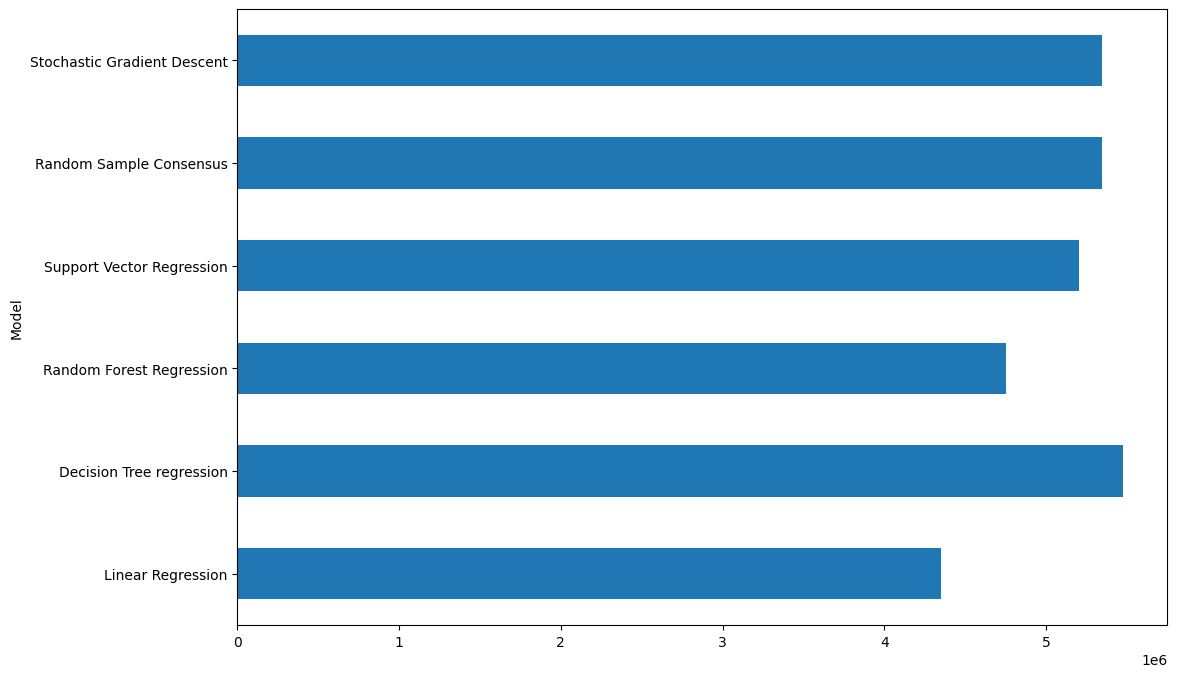

In [99]:
results_df.set_index('Model', inplace=True)
results_df['MAE'].plot(kind='barh', figsize=(12, 8))

### MSE

<AxesSubplot: ylabel='Model'>

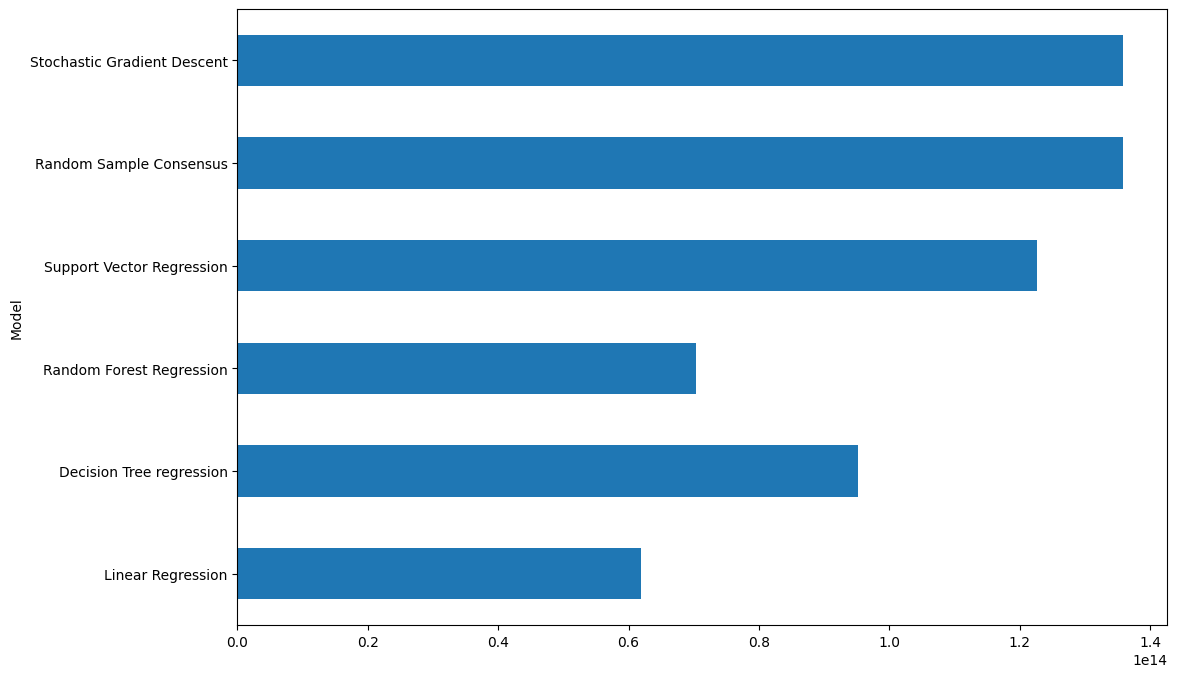

In [100]:
results_df['MSE'].plot(kind='barh', figsize=(12, 8))

### RMSE

<AxesSubplot: ylabel='Model'>

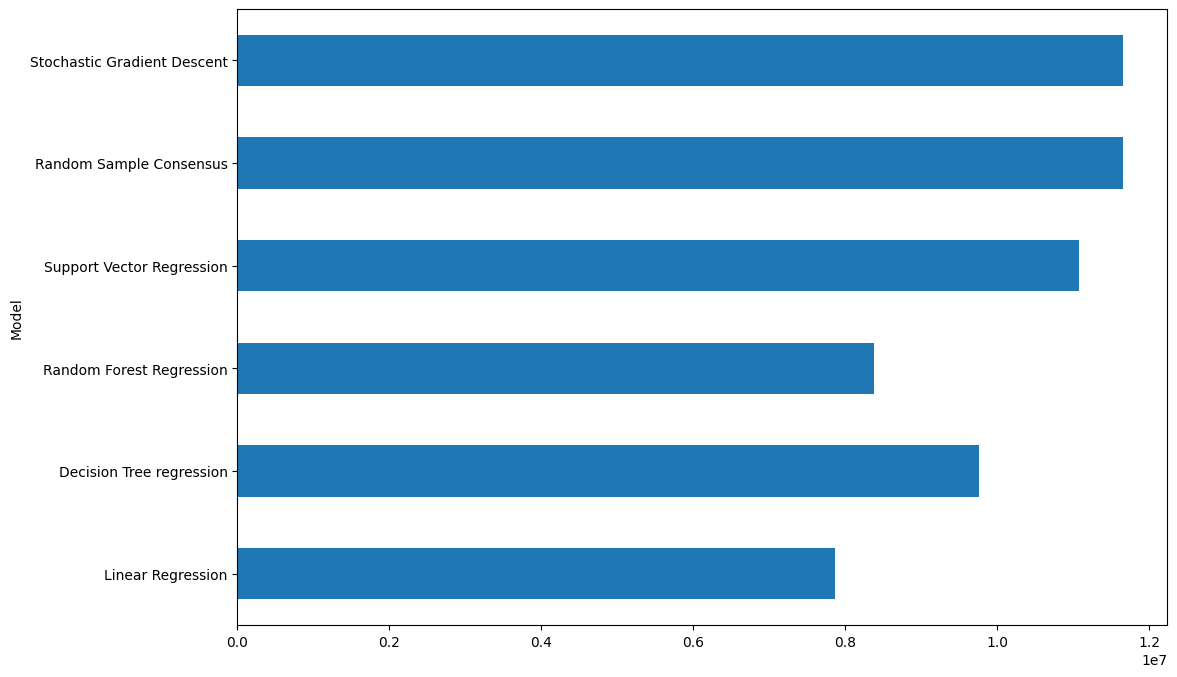

In [101]:
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))

### R2 Square

<AxesSubplot: ylabel='Model'>

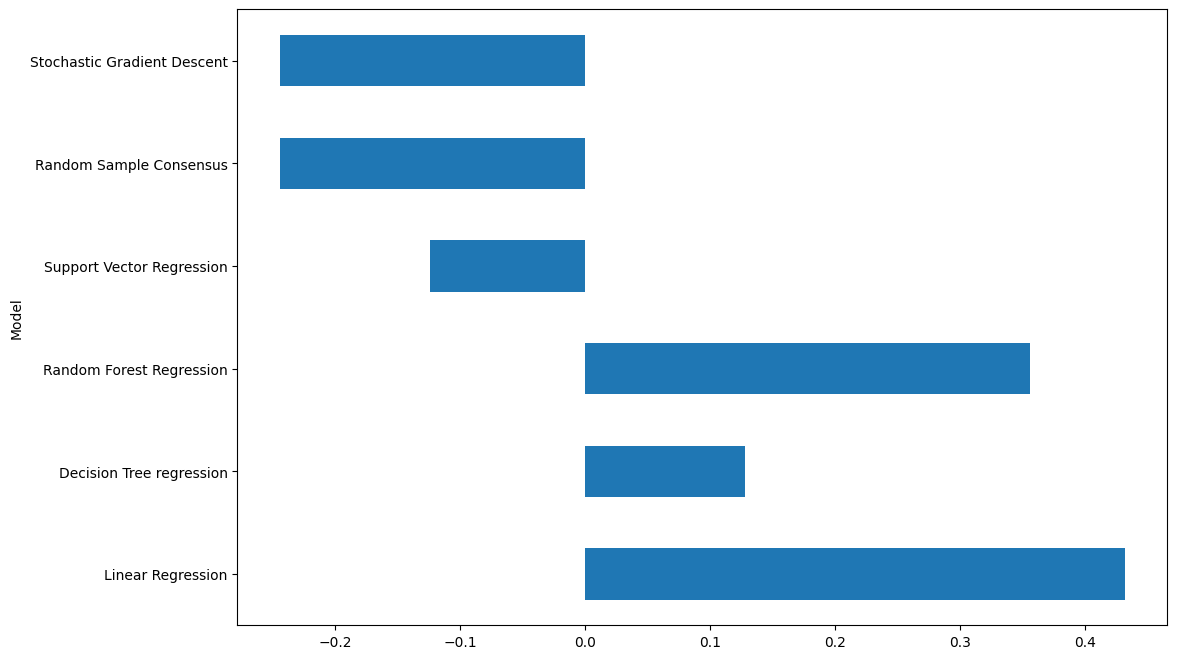

In [102]:
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# 2. Per-capita EHR spending correlation with median income in 2019 

In [105]:
# calculate the per capita payment from EHR 
df["EHR Per Capita"] = (df["EHR Total Payment"]/df["Population"])
df.head(10)

,County,Year,Unit of GDP,GDP,EHR Total Payment,Population,Median Income,EHR Per Capita
0,Alameda,2013,Thousands of dollars,100521444.0,757172.90,1563495.0,46217,0.484282
1,Kern,2013,Thousands of dollars,47122155.0,6983457.41,865511.0,30938,8.068595
2,Kings,2013,Thousands of dollars,5227087.0,631722.26,150507.0,29537,4.197295
3,Los Angeles,2013,Thousands of dollars,245565614.8,2519349.54,10013265.0,31516,0.251601
4,Mono,2013,Thousands of dollars,1343309.7,345199.57,14477.0,31546,23.844690
5,San Bernardino,2013,Thousands of dollars,70632027.0,1164753.32,2074080.0,31134,0.561576
6,Sonoma,2013,Thousands of dollars,23768530.0,234374.00,491619.0,39821,0.476739
7,Contra Costa,2014,Thousands of dollars,68282696.0,824709.14,1102416.0,49178,0.748092
8,Kern,2014,Thousands of dollars,47419015.0,6817797.68,875843.0,31347,7.784269
9,Los Angeles,2014,Thousands of dollars,245565614.8,7320017.77,10123688.0,32317,0.723058


In [106]:
df_2 = df[df["Year"]=="2019"]
df_2.head()

,County,Year,Unit of GDP,GDP,EHR Total Payment,Population,Median Income,EHR Per Capita
71,Alameda,2019,Thousands of dollars,141888634.0,6760775.32,1671855.0,60757,4.043877
72,Amador,2019,Thousands of dollars,1870309.0,865130.13,37577.0,44292,23.022863
73,Del Norte,2019,Thousands of dollars,1343309.7,1096966.33,27193.0,34746,40.340026
74,Fresno,2019,Thousands of dollars,46177593.0,6271759.00,1026358.0,33034,6.110693
75,Glenn,2019,Thousands of dollars,1343309.7,919747.52,29507.0,35384,31.170486


## Outlier Treatment: Log Transformation

Transformation of the skewed variables may also help correct the distribution of the variables. These could be logarithmic, square root, or square transformations.

In [107]:
import math

df_2['Median Income'] = df_2['Median Income'].apply(lambda x: math.log(x)) # shrink the difference among data
df_2.head()

/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80542/2494199717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Median Income'] = df_2['Median Income'].apply(lambda x: math.log(x)) # shrink the difference among data


,County,Year,Unit of GDP,GDP,EHR Total Payment,Population,Median Income,EHR Per Capita
71,Alameda,2019,Thousands of dollars,141888634.0,6760775.32,1671855.0,11.014638,4.043877
72,Amador,2019,Thousands of dollars,1870309.0,865130.13,37577.0,10.698559,23.022863
73,Del Norte,2019,Thousands of dollars,1343309.7,1096966.33,27193.0,10.455820,40.340026
74,Fresno,2019,Thousands of dollars,46177593.0,6271759.00,1026358.0,10.405293,6.110693
75,Glenn,2019,Thousands of dollars,1343309.7,919747.52,29507.0,10.474015,31.170486


In [108]:
print(df['Median Income'].skew())
print(df_2['Median Income'].skew())

1.4205353149546158
1.0524904313413512


The above output shows that the skewness value came down from 1.38 to 0.83, confirming that the distribution has been treated for extreme values.

<AxesSubplot: xlabel='Median Income', ylabel='EHR Per Capita'>

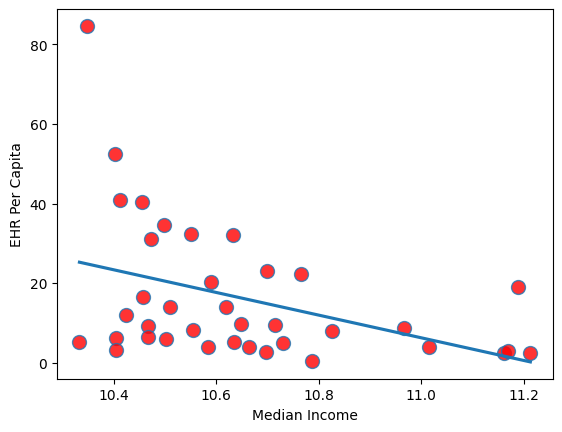

In [109]:
sns.regplot(x='Median Income', y='EHR Per Capita', data=df_2, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

## Application of Linear Regression 

In [110]:
# ================================================
# Build the model
# ================================================

# Training data
X = df_2.loc[:,["Median Income"]]  # features matrix
y = df_2.loc[:,'EHR Per Capita']  # target (response) matix

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predicting test set result

In [111]:
y_pred = model.predict(X_test)

# Comparing the test values and the predicted values
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df.head()

,Actual,Predicted
71,4.043877,4.223642
100,2.989369,-0.797553
101,0.407079,11.561195
106,9.444525,13.936672
93,22.342863,12.287554


### Checking the residuals

In [112]:
residuals = y_test - y_pred
residuals.head()

71     -0.179766
100     3.786922
101   -11.154117
106    -4.492147
93     10.055309
Name: EHR Per Capita, dtype: float64

In [113]:
pd.DataFrame({'True Values(y test)': y_test, 'Predicted Values': y_pred}).hvplot.scatter(x='True Values(y test)', y='Predicted Values')

:Scatter   [True Values(y test)]   (Predicted Values)

### Model Evaluation

In [114]:
# coefficient
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Median Income,-32.319564


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in log of Median Income is associated with a decrease of $6.177453 in total payment per capita.

In [115]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 8.665066680416805
MSE: 106.47741763905464
RMSE: 10.318789543306648
R2 Square 0.21672323904324675
__________________________________


## Check the distribution of the error terms

In [116]:
# Residual Histogram
pd.DataFrame({'Error Values': (y_test - y_pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

## Comparing machine learning models

### Application of Decision Tree regression

In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
#Predicting using test set 
y_pred = model.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [118]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Decision Tree regression", *evaluate(y_test, test_pred) , cross_val(DecisionTreeRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 14.596771173241315
MSE: 303.8031515017828
RMSE: 17.42994984220502
R2 Square -1.2348583742275943
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80542/3864298976.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Application of Random Forest Regression

In [119]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
model.fit(X_train,y_train)
#Predicting the SalePrices using test set 
y_pred = model.predict(X_test)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [120]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 14.13205318293681
MSE: 251.93541137410716
RMSE: 15.872473385522092
R2 Square -0.8533052112548387
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80542/3477842244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Application of Support Vector Regression

In [121]:
from sklearn.svm import SVR
model= SVR(kernel='rbf')
model.fit(X_train,y_train)
y_pred_svm=model.predict(X_test)
#y_pred_svm = cross_val_predict(regressor, x, y)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [122]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Support Vector Regression", *evaluate(y_test, test_pred) , cross_val(SVR())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 10.618567391749151
MSE: 170.32908844574646
RMSE: 13.051018674637872
R2 Square -0.25298696806078147
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80542/865583917.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Random Sample Consensus(RANSAC) Regression

In [123]:
model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
#train_pred = model.predict(X_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:320: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


In [124]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Random Sample Consensus", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 10.206595119919276
MSE: 196.83718342353336
RMSE: 14.029867548324658
R2 Square -0.4479877037446569
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80542/4084467583.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Stochastic Gradient Descent

In [125]:
sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

In [126]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred),cross_val(SGDRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 10.206595119919276
MSE: 196.83718342353336
RMSE: 14.029867548324658
R2 Square -0.4479877037446569
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80542/1340551889.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


## Models Comparison

### MAE

<AxesSubplot: ylabel='Model'>

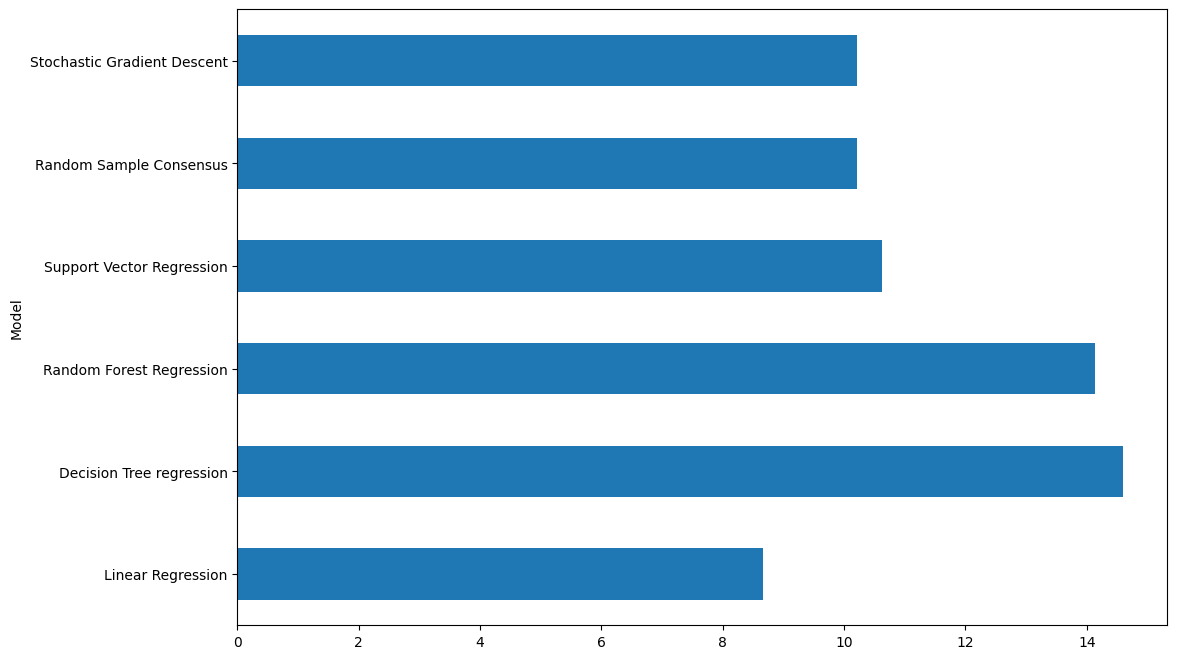

In [127]:
results_df.set_index('Model', inplace=True)
results_df['MAE'].plot(kind='barh', figsize=(12, 8))

### MSE

<AxesSubplot: ylabel='Model'>

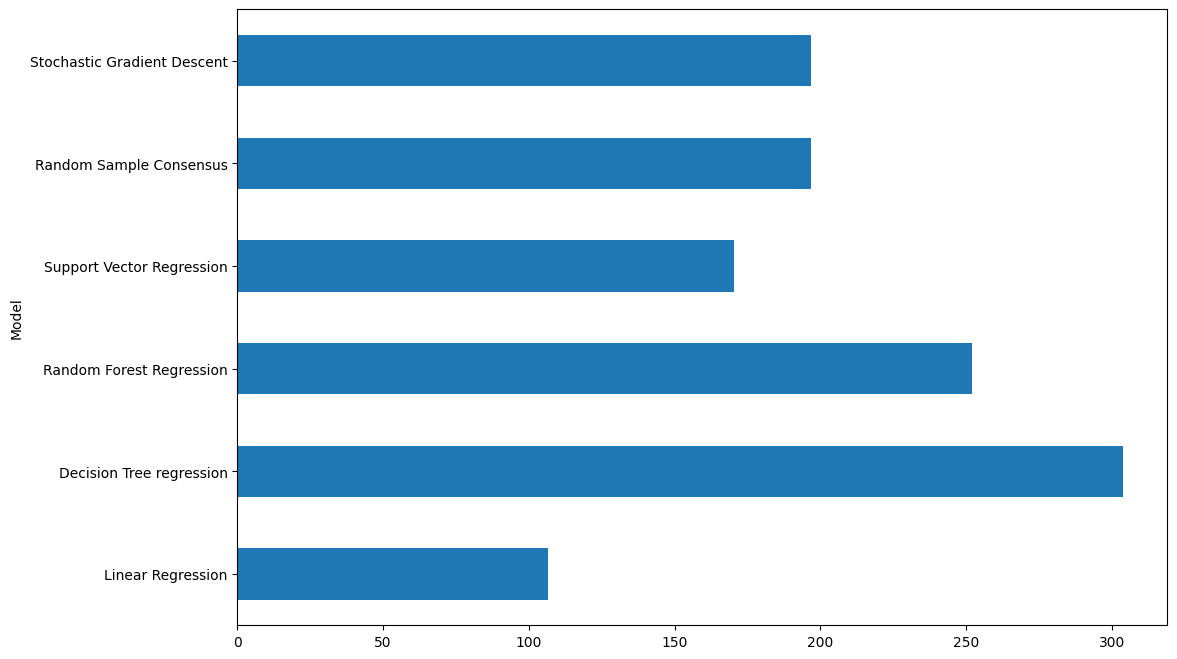

In [128]:
results_df['MSE'].plot(kind='barh', figsize=(12, 8))

### RMSE

<AxesSubplot: ylabel='Model'>

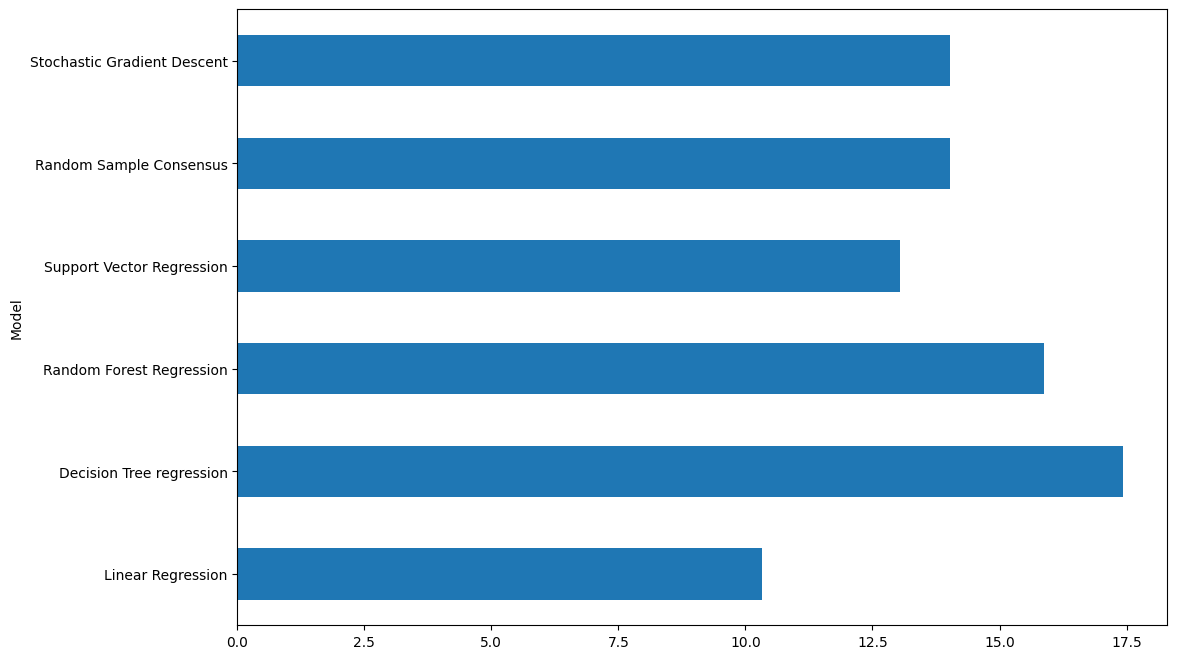

In [129]:
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))

### R2 Square

<AxesSubplot: ylabel='Model'>

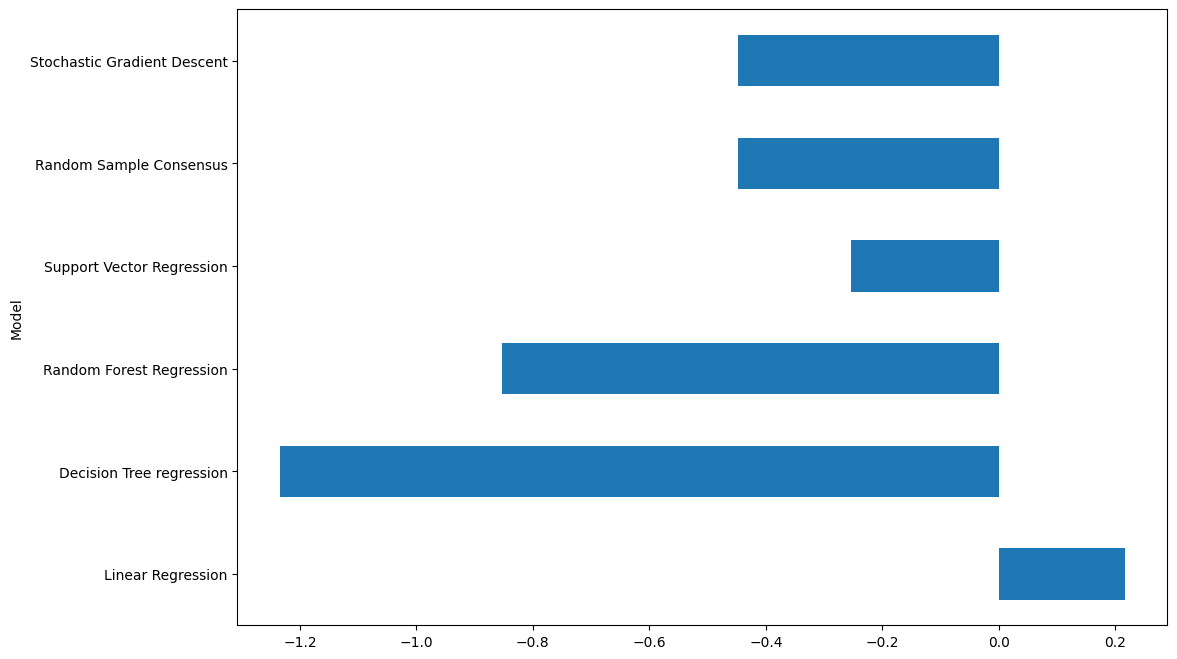

In [130]:
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))